In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
dataset = pd.read_csv('/content/Churn_Modelling.xls')

In [78]:
dataset.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [79]:
X = dataset.iloc[:,3:-1]

In [80]:
Y = dataset.iloc[:,-1]

In [81]:
X

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  
0             1               1        101348.88  
1             0               1        112542.58  
2             1               0        113931.57  
3             0               0         93826.63  
4             1               1         79084.10  
...         ...             ...              ...  
9995          1               0         96270.64  
9996          1               1        101699.77  
9997          0               1         42085.58  
9998          1               0         92888.52  
9999          1               0         38190.78  

[10000 rows x 10 columns]

In [82]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

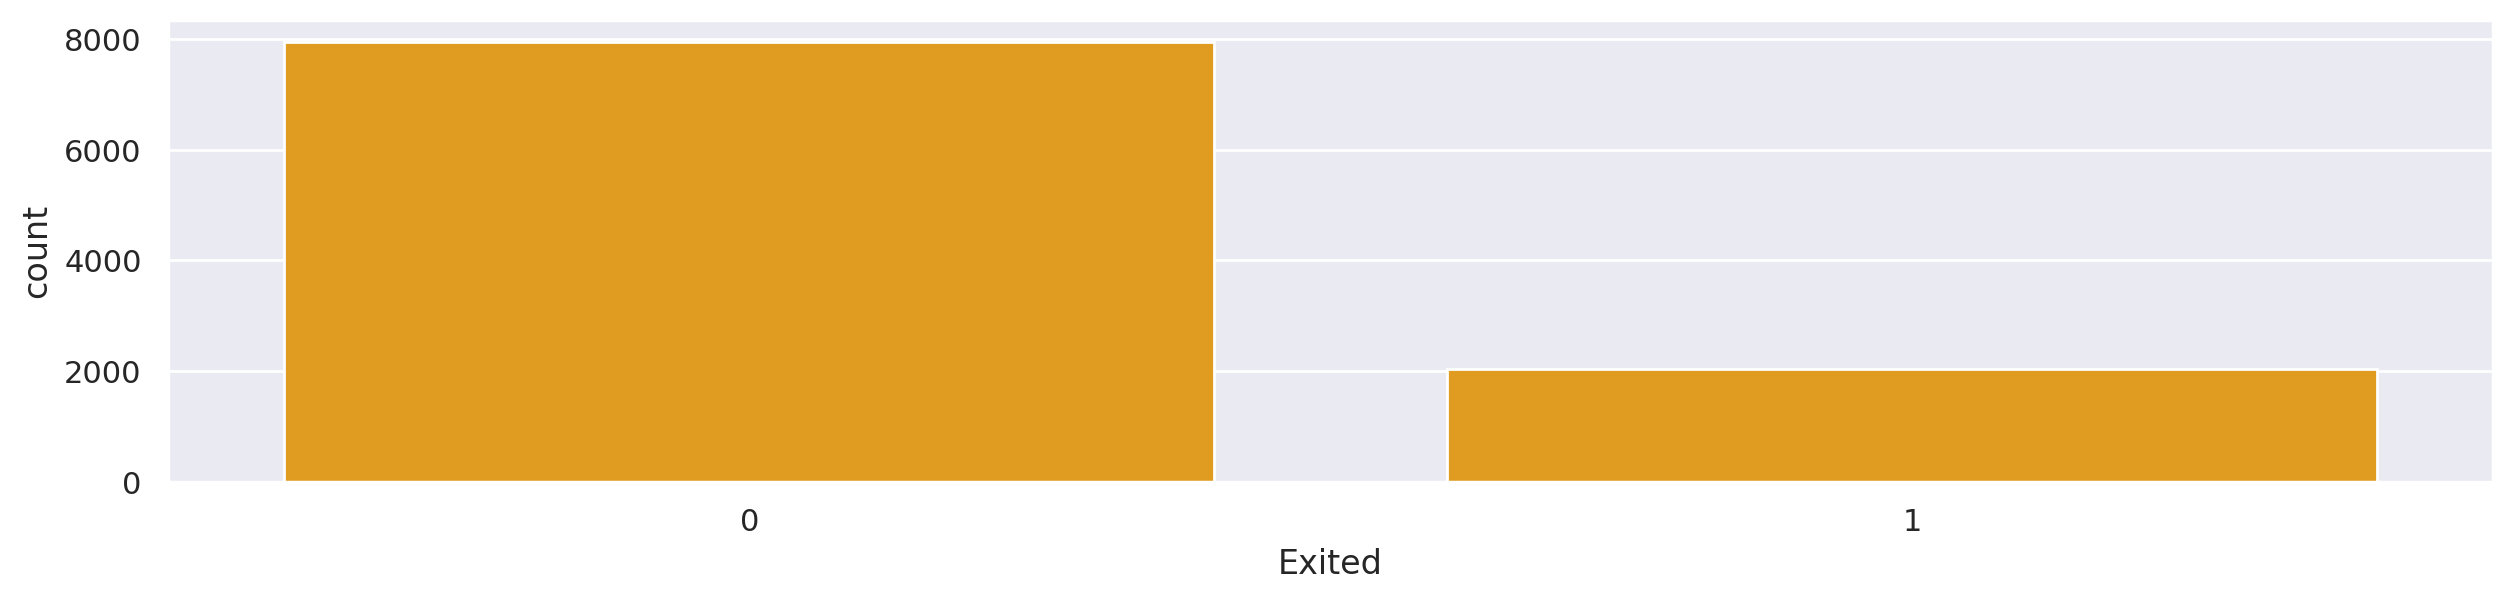

In [83]:
sns.countplot(x=Y,color='orange')

In [84]:
X.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [85]:
sns.set_theme(style="darkgrid", palette="pastel")

/tmp/ipython-input-2615008816.py:5: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x='Geography',data=dataset,ax = ax[0],palette=['Red','yellow','green'],hue = Y)


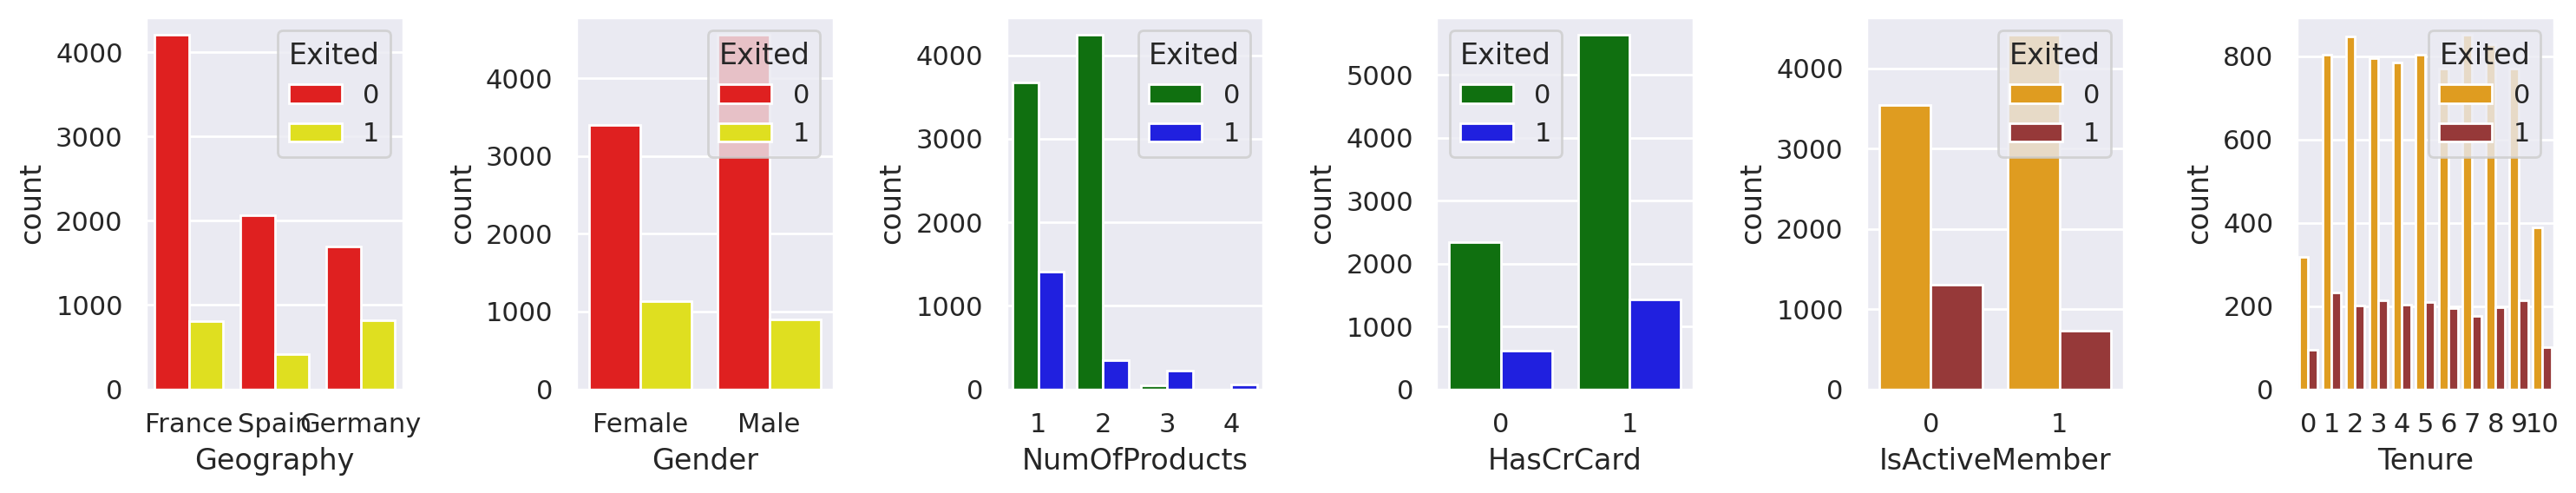

In [86]:
plt.rcParams['figure.figsize'] = (15,3)
plt.rcParams['figure.dpi'] = 200

fig,ax = plt.subplots(1,6)
sns.countplot(x='Geography',data=dataset,ax = ax[0],palette=['Red','yellow','green'],hue = Y)
sns.countplot(x='Gender',data = dataset,palette = ['Red','Yellow'],hue=Y,ax = ax[1])
sns.countplot(x='NumOfProducts',data = dataset,ax = ax[2],palette = ['Green','blue'],hue = Y)
sns.countplot(x = 'HasCrCard',data = dataset,hue = Y,ax = ax[3],palette = ['green','blue'])
sns.countplot(x = 'IsActiveMember',data = dataset,hue = Y,ax = ax[4],palette = ['orange','brown'])
sns.countplot(x = 'Tenure',data = dataset,hue = Y,ax = ax[5],palette = ['orange','brown'])
plt.tight_layout()

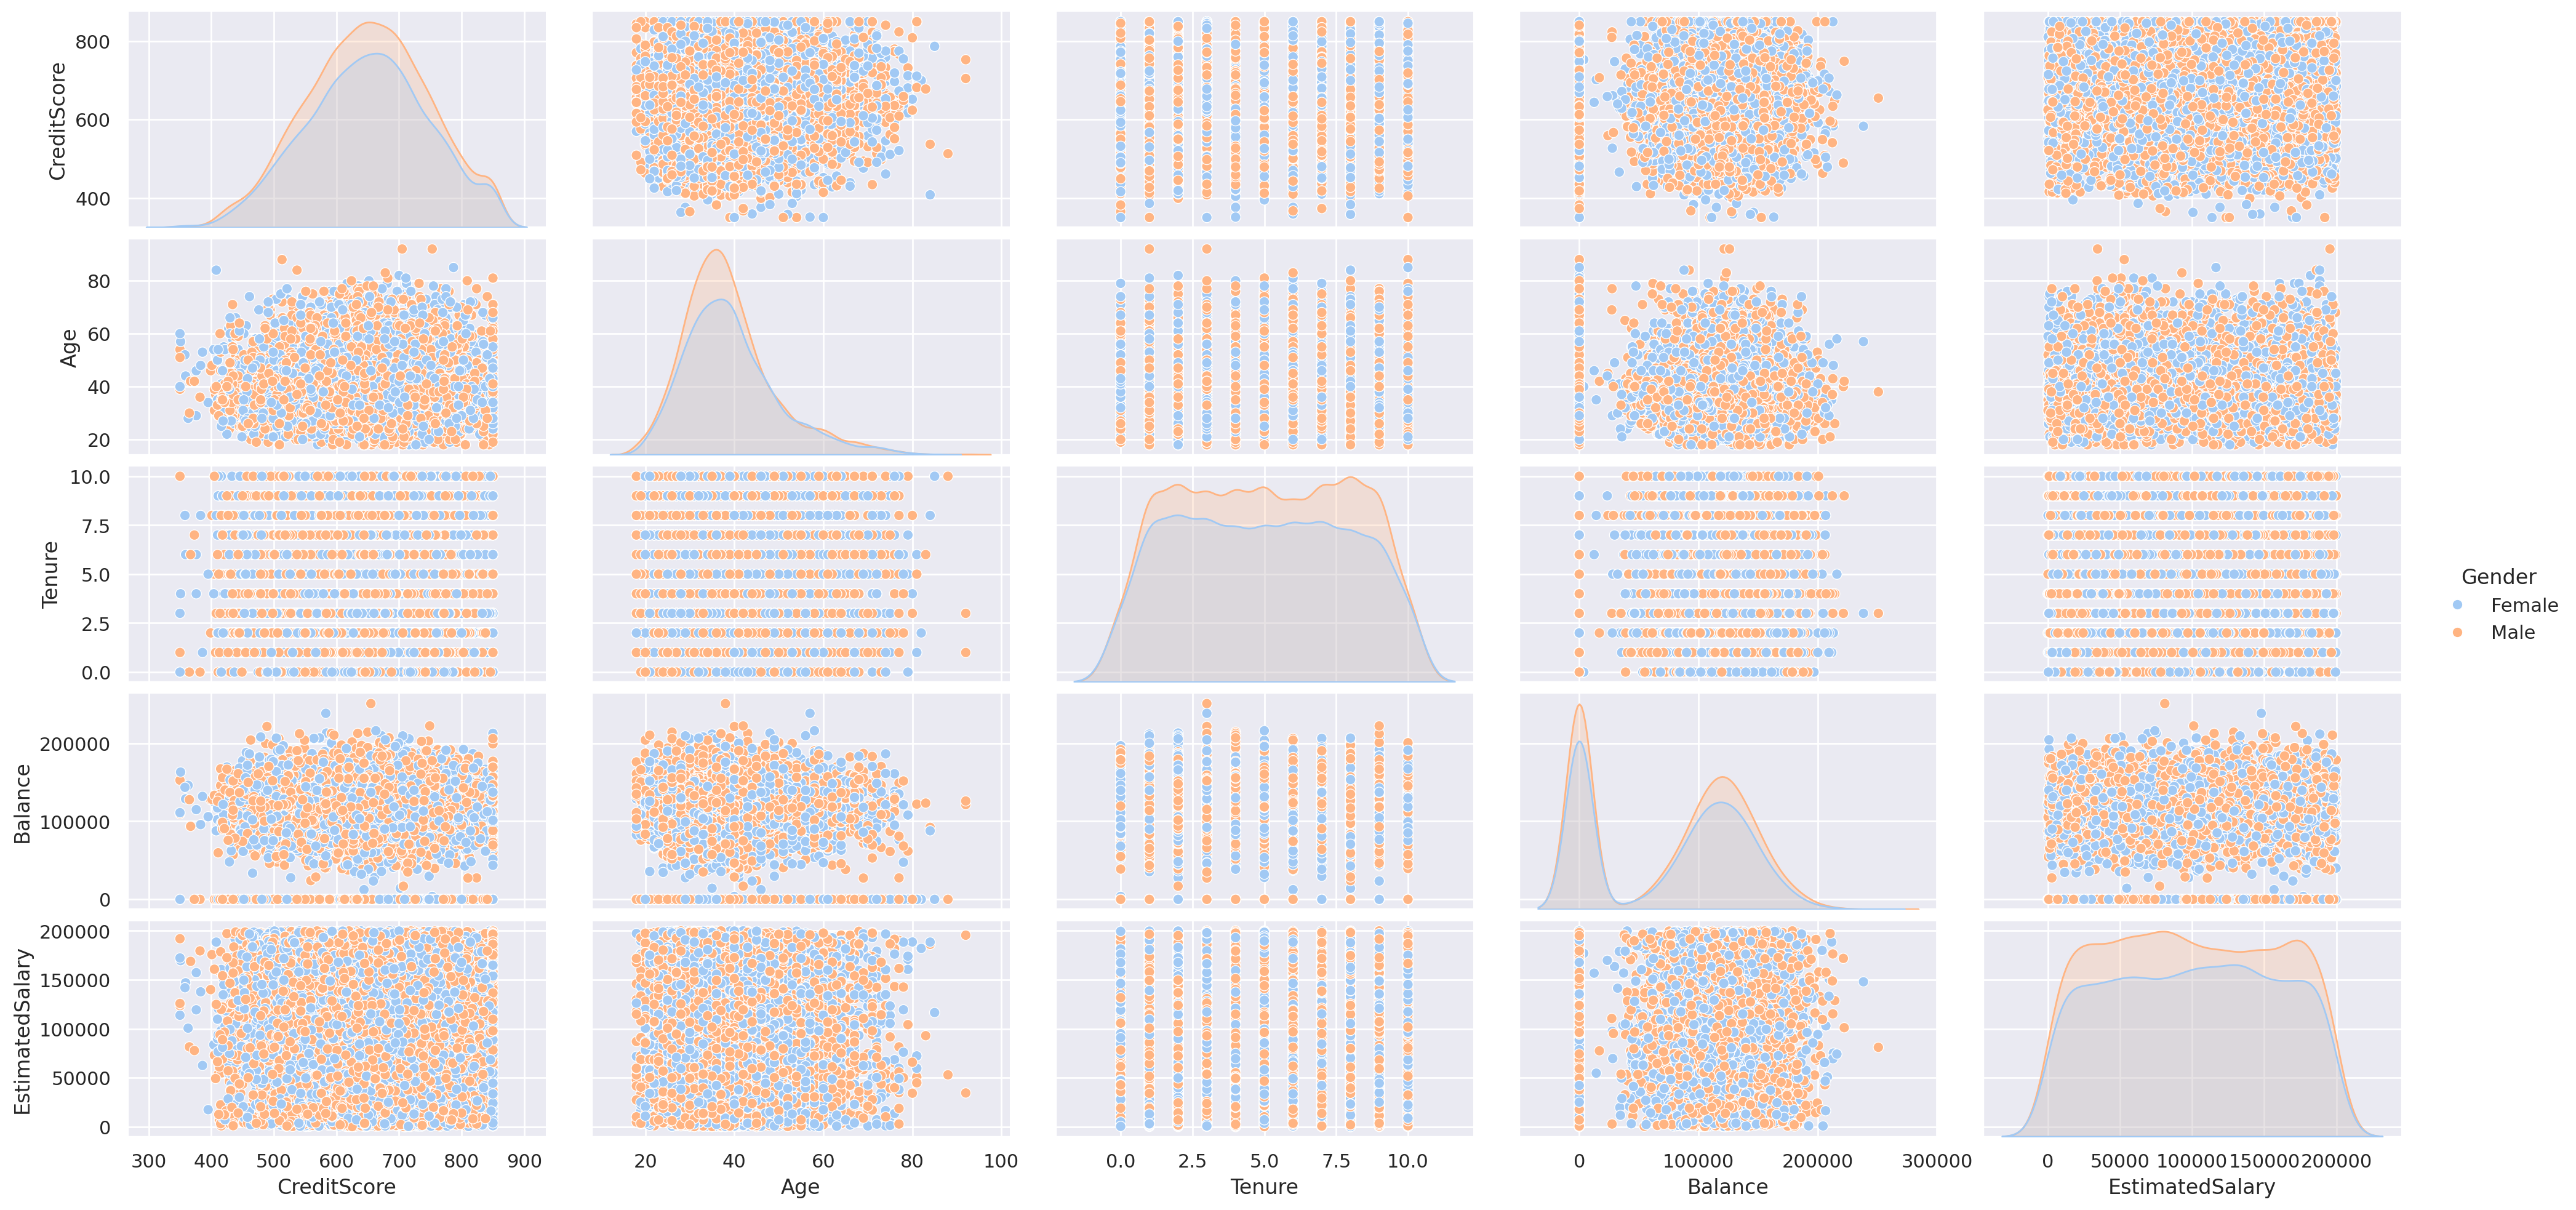

In [87]:
sns.pairplot(dataset,vars=['CreditScore','Age', 'Tenure', 'Balance', 'EstimatedSalary'],height= 2,aspect = 2,hue = 'Gender')
# aspect = 2 means width is twice times of height and we take in pairplot only numerical values not categorical values

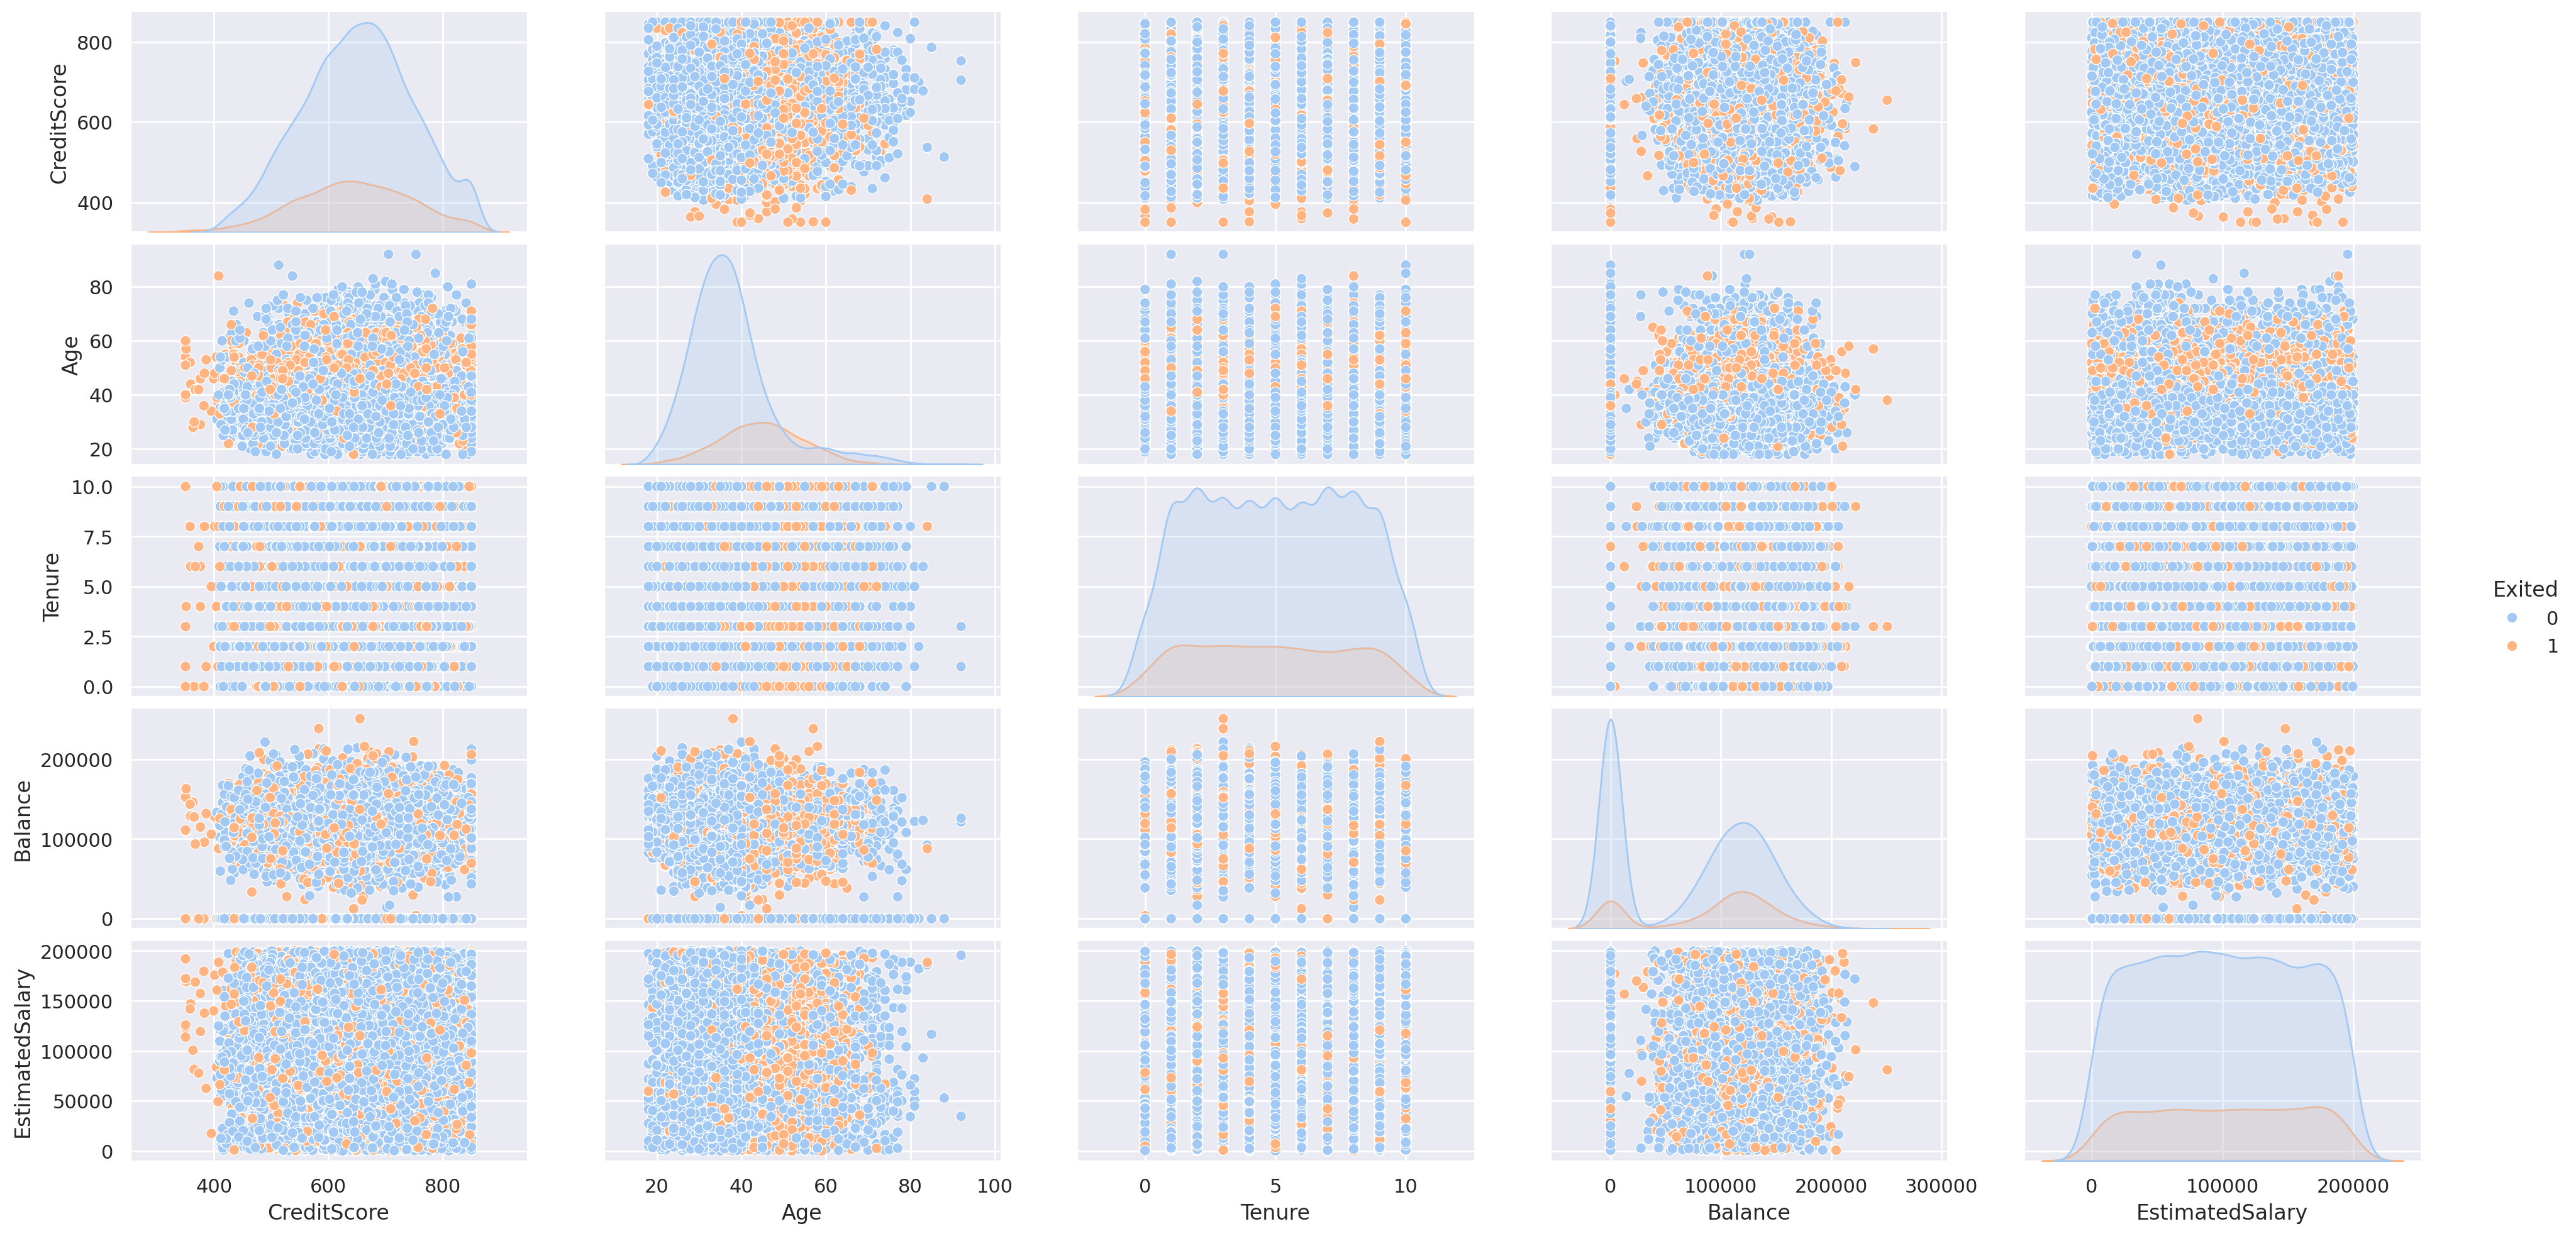

In [88]:
  sns.pairplot(dataset,vars = ['CreditScore','Age', 'Tenure', 'Balance', 'EstimatedSalary'],height = 2,aspect = 2,hue = 'Exited')

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [90]:
X

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  
0             1               1        101348.88  
1             0               1        112542.58  
2             1               0        113931.57  
3             0               0         93826.63  
4             1               1         79084.10  
...         ...             ...              ...  
9995          1               0         96270.64  
9996          1               1        101699.77  
9997          0               1         42085.58  
9998          1               0         92888.52  
9999          1               0         38190.78  

[10000 rows x 10 columns]

In [91]:
X_onehot = pd.get_dummies(X,drop_first=True)

In [92]:
X_onehot.astype(int)

CreditScore  Age  Tenure  Balance  NumOfProducts  HasCrCard  \
0             619   42       2        0              1          1   
1             608   41       1    83807              1          0   
2             502   42       8   159660              3          1   
3             699   39       1        0              2          0   
4             850   43       2   125510              1          1   
...           ...  ...     ...      ...            ...        ...   
9995          771   39       5        0              2          1   
9996          516   35      10    57369              1          1   
9997          709   36       7        0              1          0   
9998          772   42       3    75075              2          1   
9999          792   28       4   130142              1          1   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
0                  1           101348                  0                0   
1                  1           112542                  0                1   
2                  0           113931                  0                0   
3                  0            93826                  0                0   
4                  1            79084                  0                1   
...              ...              ...                ...              ...   
9995               0            96270                  0                0   
9996               1           101699                  0                0   
9997               1            42085                  0                0   
9998               0            92888                  1                0   
9999               0            38190                  0                0   

      Gender_Male  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
9995            1  
9996            1  
9997            0  
9998            1  
9999            0  

[10000 rows x 11 columns]

In [93]:
X_train,X_test,Y_train,Y_test = train_test_split(X_onehot,Y,test_size = 0.2,random_state = 42,stratify = Y)

In [94]:
X_train.describe()

CreditScore          Age       Tenure        Balance  NumOfProducts  \
count  8000.000000  8000.000000  8000.000000    8000.000000    8000.000000   
mean    650.752500    38.946625     5.016625   76381.207499       1.529500   
std      96.596432    10.526876     2.896791   62302.053597       0.581741   
min     350.000000    18.000000     0.000000       0.000000       1.000000   
25%     584.000000    32.000000     3.000000       0.000000       1.000000   
50%     652.000000    37.000000     5.000000   97055.145000       1.000000   
75%     717.000000    44.000000     8.000000  127633.195000       2.000000   
max     850.000000    92.000000    10.000000  238387.560000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary  
count  8000.000000     8000.000000      8000.000000  
mean      0.708750        0.514875     99730.811581  
std       0.454367        0.499810     57335.116540  
min       0.000000        0.000000        11.580000  
25%       0.000000        0.000000     50691.817500  
50%       1.000000        1.000000     99446.940000  
75%       1.000000        1.000000    148527.730000  
max       1.000000        1.000000    199992.480000

In [95]:
# We need to standardize the data

In [96]:
scaler = StandardScaler()

In [97]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [98]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,InputLayer
from tensorflow.keras.optimizers import Adam

In [99]:
input_shape = X_train.shape[1:]
input_shape

(11,)

In [100]:
class_weights = Y.value_counts().to_dict()
class_weights

{0: 7963, 1: 2037}

There is imbalanced class of lables so in order to balance the weights of labels we need to division of total samples with multiplication of len of total class and weight ofthat particular class this will give that the weight if first class should be 0.6279040562602034 and weight of second class should be 2.454590083456063 so that label unequality woukd not effect the model optimization or accuracy

In [101]:
total_Sample = sum(class_weights.values())

In [102]:
total_Sample

10000

In [103]:
updated_class_weights = [total_Sample/(len(class_weights)*class_weights[0]),total_Sample/(len(class_weights)*class_weights[1])]

In [104]:
updated_class_weights

[0.6279040562602034, 2.454590083456063]

In [105]:
class_weights[1]

2037

In [106]:
len(class_weights)

2

In [107]:
model = Sequential()
model.add(InputLayer(input_shape))  # Here input shape is 11 which is stated above
model.add(Dense(128,activation = 'relu'))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))


In [108]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [109]:
updated_class_weights

[0.6279040562602034, 2.454590083456063]

In [110]:
updated_class_weights = {0:0.6279040562602034,1:2.454590083456063}

In [111]:
history  = model.fit(X_train,Y_train,batch_size = 32,epochs = 15,class_weight=updated_class_weights,validation_split=0.1) # class_weights have two choices either balanced or what we have did balanced ourselves

Epoch 1/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7210 - loss: 0.5756 - val_accuracy: 0.7375 - val_loss: 0.4963
Epoch 2/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7655 - loss: 0.4892 - val_accuracy: 0.7650 - val_loss: 0.4822
Epoch 3/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7698 - loss: 0.4756 - val_accuracy: 0.8112 - val_loss: 0.4167
Epoch 4/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7961 - loss: 0.4441 - val_accuracy: 0.7788 - val_loss: 0.4473
Epoch 5/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7974 - loss: 0.4521 - val_accuracy: 0.7650 - val_loss: 0.4576
Epoch 6/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8010 - loss: 0.4360 - val_accuracy: 0.7975 - val_loss: 0.4285
Epoch 7/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8132 - loss: 0.4222 - val_accuracy: 0.7800 - val_loss: 0.4454
Epoch 8/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7933 - loss: 0.4471 - val_accuracy: 0.

In [112]:
hist = pd.DataFrame(history.history)
hist

accuracy      loss  val_accuracy  val_loss
0   0.720278  0.556780       0.73750  0.496322
1   0.772083  0.488709       0.76500  0.482174
2   0.780556  0.469770       0.81125  0.416741
3   0.787083  0.459505       0.77875  0.447309
4   0.800139  0.452452       0.76500  0.457620
5   0.797083  0.445397       0.79750  0.428536
6   0.802361  0.439803       0.78000  0.445434
7   0.802361  0.433911       0.77875  0.448379
8   0.804028  0.429447       0.80375  0.412741
9   0.807361  0.425373       0.76875  0.470020
10  0.809028  0.420602       0.80250  0.412595
11  0.808889  0.416213       0.79375  0.420516
12  0.815417  0.409481       0.80000  0.414155
13  0.816111  0.406312       0.77625  0.469021
14  0.819028  0.401327       0.76375  0.481154

<Axes: >

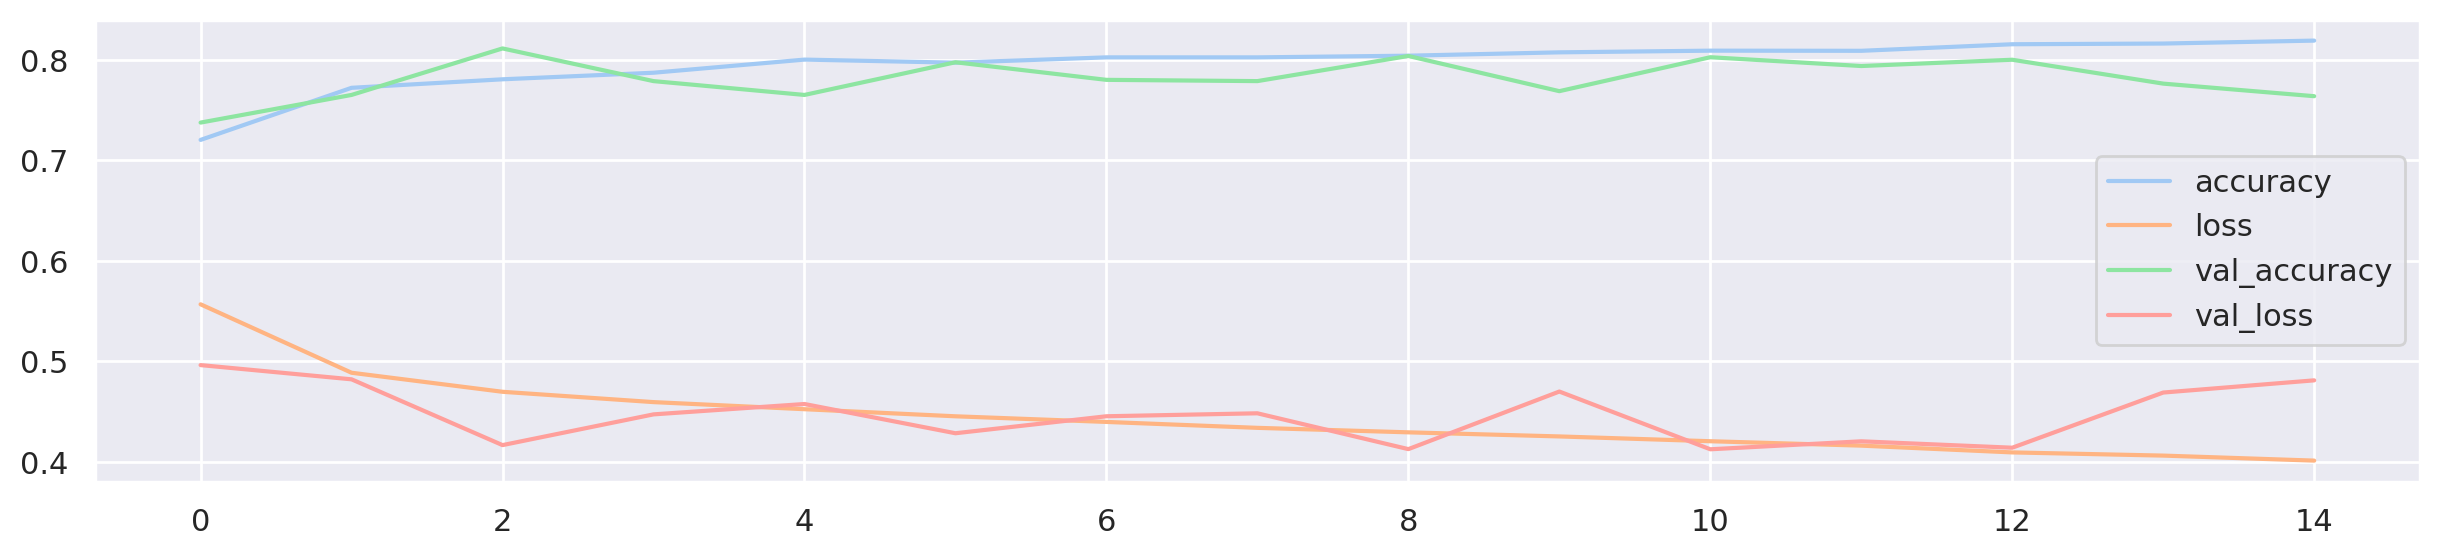

In [113]:
hist.plot()

In [114]:
y_pred = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [115]:
y_pred

array([[0.05009872],
       [0.35202935],
       [0.21416312],
       ...,
       [0.94901645],
       [0.0441762 ],
       [0.37938195]], dtype=float32)

These are showing the probabilities

In [116]:
y_pred = (y_pred>0.5).astype(int)

In [117]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [118]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.77      0.84      1593
           1       0.46      0.78      0.58       407

    accuracy                           0.77      2000
   macro avg       0.70      0.77      0.71      2000
weighted avg       0.84      0.77      0.79      2000



In [119]:
import pickle
import os

In [120]:
os.makedirs('model',exist_ok = True)

In [121]:
model.save('model/churn_model.h5')

Since the model is saved but when we provide the data for testing then again it need to be preprocess because preprocessing steps does not save in model so we need to dave the preprocess steps also

In [122]:
pickle.dump(scaler,open('model/scaler.pkl','wb'))

In [123]:
model1 = keras.models.load_model('model/churn_model.h5')
scaler1 = pickle.load(open('model/scaler.pkl','rb'))

In [124]:
model1

<Sequential name=sequential_1, built=True>

In [125]:
X_onehot.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [147]:
test = [[400,61,1,83807.86,1,0,1,112542.58,0,1,0]]
test = scaler.transform(test)
test

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-2.59603972,  2.09508999, -1.38666414,  0.11921143, -0.91025649,
        -1.55996038,  0.97067965,  0.22346809, -0.57831252,  1.73089688,
        -1.10191942]])

In [148]:
pred = model.predict(test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [149]:
pred

array([[0.33245367]], dtype=float32)

In [150]:
(pred>0.5).astype(int)

array([[0]])

In [151]:
test = [[400,61,1,83807.86,1,0,1,112542.58,0,1,0]]
test = scaler1.transform(test)
test

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-2.59603972,  2.09508999, -1.38666414,  0.11921143, -0.91025649,
        -1.55996038,  0.97067965,  0.22346809, -0.57831252,  1.73089688,
        -1.10191942]])

In [152]:
pred = model1.predict(test)
print(pred)
(pred>0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
[[0.33245367]]


array([[0]])